 
## Rushikesh Narhare 

### Table of Contents:
1. [Data Preprocessing](#Data-Preprocessing)
    
    
2. [Basic Exploratory Data Analysis](#Basic-Exploratory-Data-Analysis)

        
3. [Join and Split Data](#Join-and-Split-Data)


4. [Modelling](#Modelling)


5. [Hypothesis Test](#Hypothesis-Test)


6. [Recommendations](#Recommendations)

## Data Preprocessing

In [1]:
import collections
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

pd.set_option('display.max_columns', 65)

In [2]:
df_call= pd.read_excel("data.xlsx", sheet_name= "Call Facts")

In [3]:
df_leads= pd.read_excel("data.xlsx", sheet_name= "Lead Facts")

### Data Cleaning

In [4]:
#Dropping column having single value, CallType beacause calltypeId is present and Id columns

#df_call.nunique()
#df_call.info()

columns=['callTypeId','dimProgramId','dispoCode', 'talkTimeSeconds','cdsCallsFactId', 'dialerCallId',
                               'callDnis', 'totalCalls', 'outboundCalls', 'outboundCallbacks', 'inboundCalls', 'manualCalls', 
                               'inboundCallsHandled','callSkill'] 

df_call= df_call.drop(columns= columns, axis=1)

In [5]:
#Dropping columns having all null values or single values  and Id columns.

#df_leads.nunique()
#df_leads.info()

columns=['dimProgramId', 'tztMarketingProject', 'omsMarketingProject', 'externalSystem', 'dimMarketingSourceId',
         'dimMarketingSourceId', 'productOfInterest', 'tobacco', 'expirationInDays','originalInboundDnis' , 
         'cdsLeadFactId', 'sourceSystem', 'sourceSystemId', 'cdsPersonId', 'externalSystemId','campaign id',
         'leadTypeId', 'leadZip', 'callCenterLeadCreatedReason','callCenterLeadCloneSourceId', 
         'callCenterMinutesToFirstDialAttempt', 'callCenterDialAttempts','leadsReceived', 'leadsAccepted', 
         'leadsRejected', 'rejectType','rejectReason','callCenterLeadsTotal', 'callCenterLeadEverContacted',
         'callCenterLeadEverSold', 'callCenterLatestDispo', 'batchid', 'leadType', 'deliveryMethod', 'everCallback','afid']

df_leads= df_leads.drop(columns= columns, axis=1)

In [6]:
# Changing null and 0 values in gender column, to do so I have combined 0 and nan values in U category.
df_leads.gender.unique()

array(['F', 'M', 'U', nan, 0], dtype=object)

In [7]:
# filling and replacing 0 and nan values.
df_leads.gender= df_leads.gender.fillna(value='U')
df_leads.gender= df_leads.gender.replace(to_replace=0, value='U')

In [8]:
df_call.head()

,dialerLeadId,dimAgentId,callDate,callDateKey,callType,dispoGroup,dispoDescription,callAttemptNumber,handleTimeSeconds,callEndDate,callEndDateKey,nobleDispoCode
0,3044121,749,2018-07-12 17:23:36.630,2018071217,Outbound,No Sale,Other Refusal / Not Interested,5,101,2018-07-12 17:25:17.337,2018071217,NS
1,3021053,737,2018-07-16 11:28:26.143,2018071611,Inbound,No Sale,Inquiry / Support Call,3,112,2018-07-16 11:30:18.340,2018071611,NS
2,3356059,1142,2018-07-16 11:40:35.770,2018071611,Outbound,Non Workable,Disconnected Number,4,9,2018-07-16 11:40:44.323,2018071611,DC
3,3021053,731,2018-07-16 11:44:22.557,2018071611,Manual Dial,No Sale,Inquiry / Support Call,4,303,2018-07-16 11:49:25.313,2018071611,NS
4,3185345,987,2018-07-16 11:48:39.603,2018071611,Outbound,Still Workable,Left Message,3,86,2018-07-16 11:50:05.153,2018071611,LM


## Basic Exploratory Data Analysis

Creating 2 separate dataframes from Lead Facts sheet for Sale and No Sale Categories, and merge it with the Calls data to get insights about varaious columns for better understanding of the data.

In [9]:
df_leads_sales= df_leads[df_leads.callCenterLatestDispoGroup == 'Sale']
df_leads_nosales= df_leads[df_leads.callCenterLatestDispoGroup == 'No Sale']

merged_sales= pd.merge(left=df_call, right=df_leads_sales, on='dialerLeadId', how= 'inner')
merged_nosales= pd.merge(left=df_call, right=df_leads_nosales, on='dialerLeadId', how= 'inner')

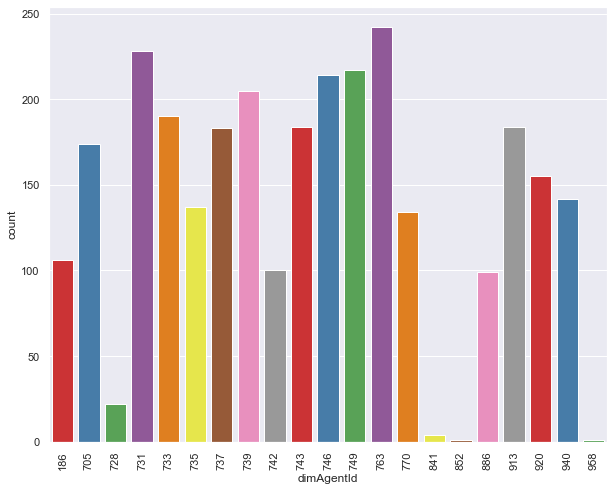

In [10]:
# From this countplot we can infer that in the sales category agents with agent ID 731, 763 have made maximum number of calls.

sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="darkgrid")
ax = sns.countplot(x="dimAgentId", data=merged_sales, palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Here, I have used the Count plot on various columns to get a better insight of the data about which categoty is having maximun entries.

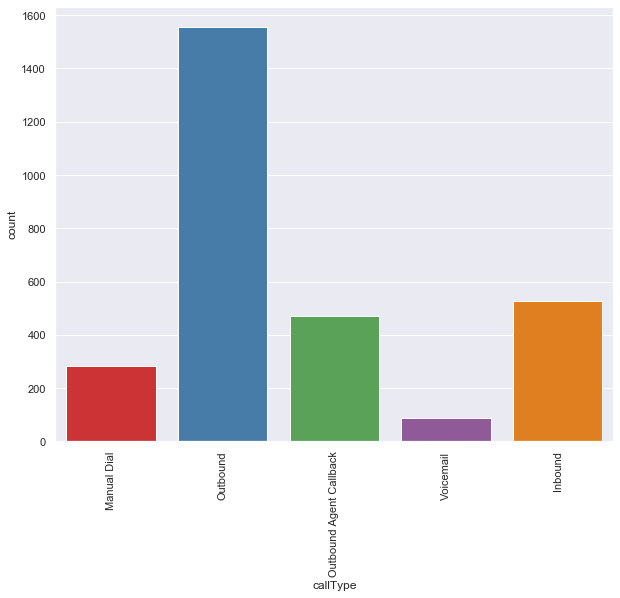

In [11]:
#CallType Plot
# Seaborn Countplot to illustrate the maximun number of Calls were Outbound.

sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="darkgrid")
ax = sns.countplot(x="callType", data=merged_sales, palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

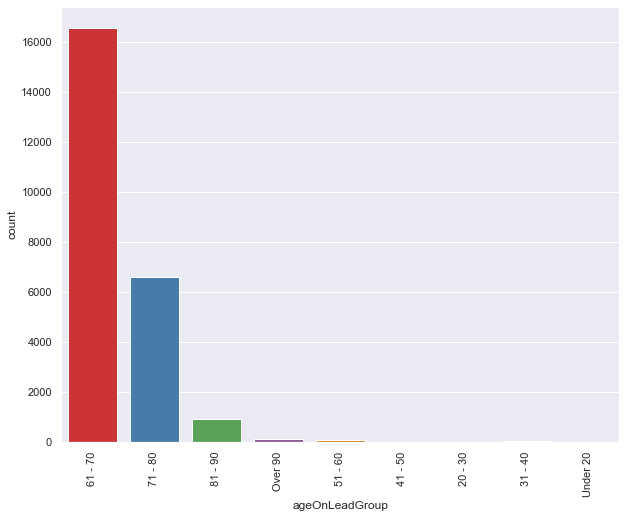

In [12]:
#Highest Age_group having maximum No sales is the age_group 61-70.

sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="darkgrid")
ax = sns.countplot(x="ageOnLeadGroup", data=merged_nosales, palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

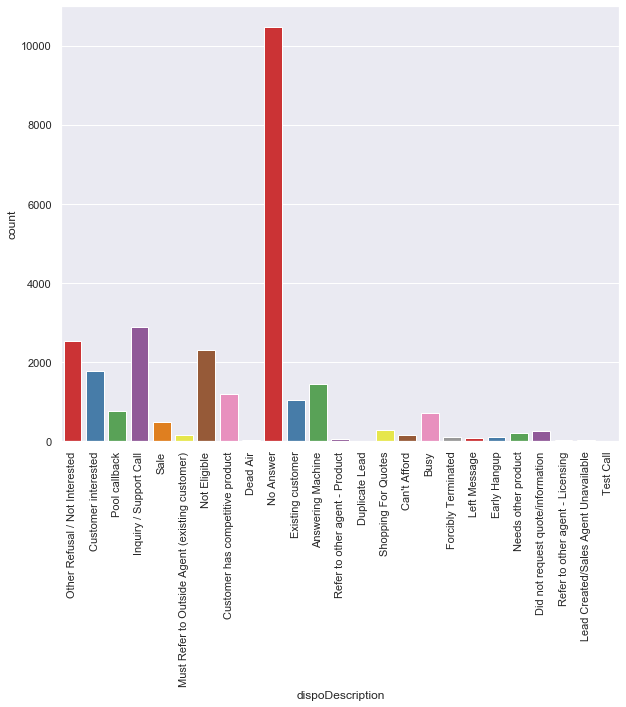

In [13]:
#Following graph illustrates the top reason that contributes to NO sales as  the customers do not answer the calls.

sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="darkgrid")
ax = sns.countplot(x="dispoDescription", data=merged_nosales, palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

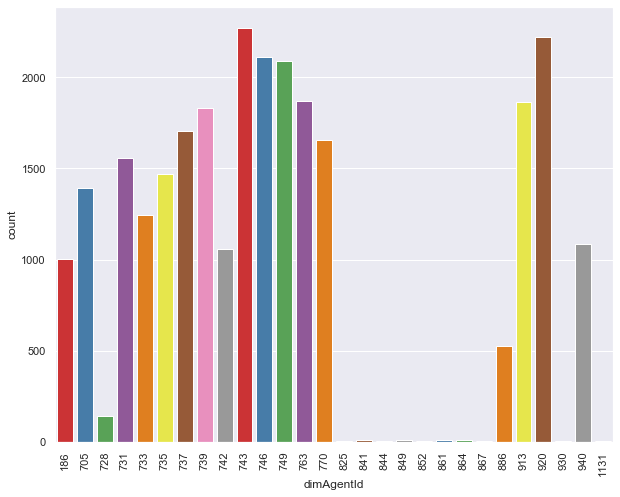

In [14]:
#This graph shows us even if the sales are not made, agest anre call  cusotmers and some more then 2000 calls were made by some agents.

sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="darkgrid")
ax = sns.countplot(x="dimAgentId", data=merged_nosales, palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

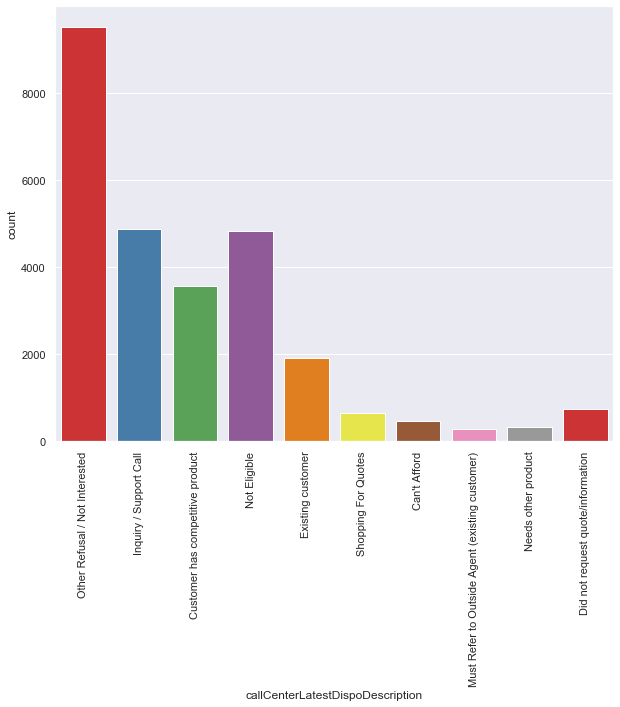

In [15]:
#This graph tells us that the customers rejection reason is they are not interested.

sns.set(style="darkgrid")
ax = sns.countplot(x="callCenterLatestDispoDescription", data=merged_nosales, palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

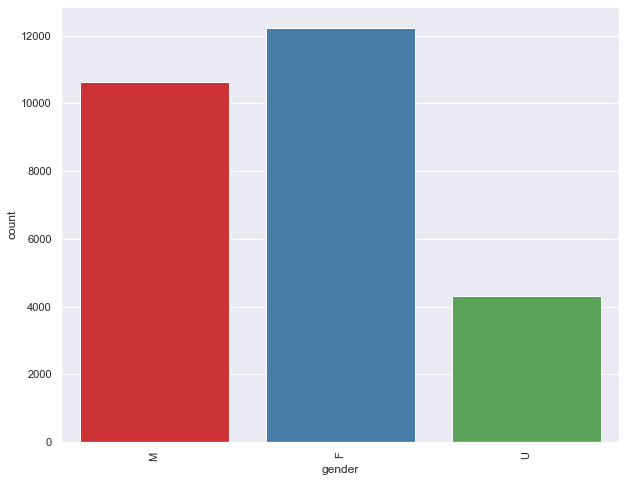

In [16]:
#This graph tells us that female customers reject the product or they are not interested as compared to other gender.

sns.set(style="darkgrid")
ax = sns.countplot(x="gender", data=merged_nosales, palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [17]:
#Hour Analysis
# We can extract the call of hour from leadDateKey column to analyze which time of the day people reject or decline the calls.

merged_nosales.hour= merged_nosales.callDateKey%100

d:\software\python3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


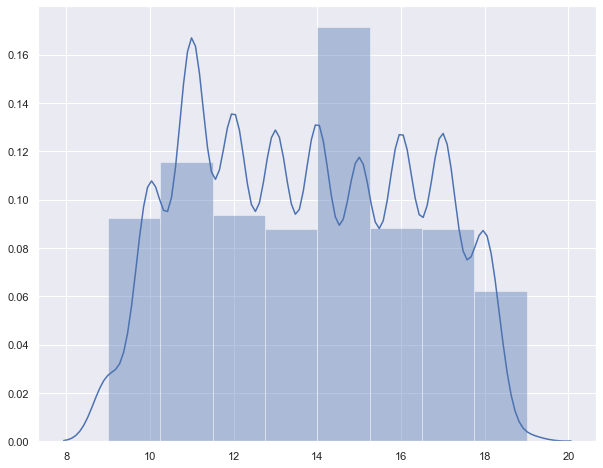

In [18]:
ax = sns.distplot(merged_nosales.hour.values, bins=8)

In [19]:
merged_nosales.head()

,dialerLeadId,dimAgentId,callDate,callDateKey,callType,dispoGroup,dispoDescription,callAttemptNumber,handleTimeSeconds,callEndDate,callEndDateKey,nobleDispoCode,leadDate,leadDateKey,originalContactType,ageOnLeadGroup,gender,leadCost,callCenterLatestDispoGroup,callCenterLatestDispoDescription,currentSkill,originalSkill,maxAttempts,dailyMaxAttempts
0,3044121,749,2018-07-12 17:23:36.630,2018071217,Outbound,No Sale,Other Refusal / Not Interested,5,101,2018-07-12 17:25:17.337,2018071217,NS,2018-02-23 08:52:00,2018022308,OB,61 - 70,M,70.0,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0
1,3044121,749,2018-07-02 13:42:18.623,2018070213,Outbound Agent Callback,Agent Call Back,Customer interested,4,111,2018-07-02 13:44:09.727,2018070213,CB,2018-02-23 08:52:00,2018022308,OB,61 - 70,M,70.0,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0
2,3044121,749,2018-02-26 14:39:03.527,2018022614,Outbound,Agent Call Back,Customer interested,2,291,2018-02-26 14:43:54.327,2018022614,CB,2018-02-23 08:52:00,2018022308,OB,61 - 70,M,70.0,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0
3,3044121,705,2018-02-23 10:06:04.343,2018022310,Outbound,Still Workable,Pool callback,1,104,2018-02-23 10:07:48.183,2018022310,CB,2018-02-23 08:52:00,2018022308,OB,61 - 70,M,70.0,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0
4,3044121,749,2018-06-01 11:00:28.600,2018060111,Outbound Agent Callback,Agent Call Back,Customer interested,3,919,2018-06-01 11:15:47.473,2018060111,CB,2018-02-23 08:52:00,2018022308,OB,61 - 70,M,70.0,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0


In [20]:
# Grouping leadid to get handleTimeSeconds to get top 10 leadIds having maximum time invested and still nosales.

leadid_groupby= merged_nosales[['dialerLeadId', 'handleTimeSeconds']]
leadid_groupby = leadid_groupby.groupby(['dialerLeadId']).mean()
leadid_groupby= leadid_groupby.sort_values(by= 'handleTimeSeconds', ascending= False).head(10)

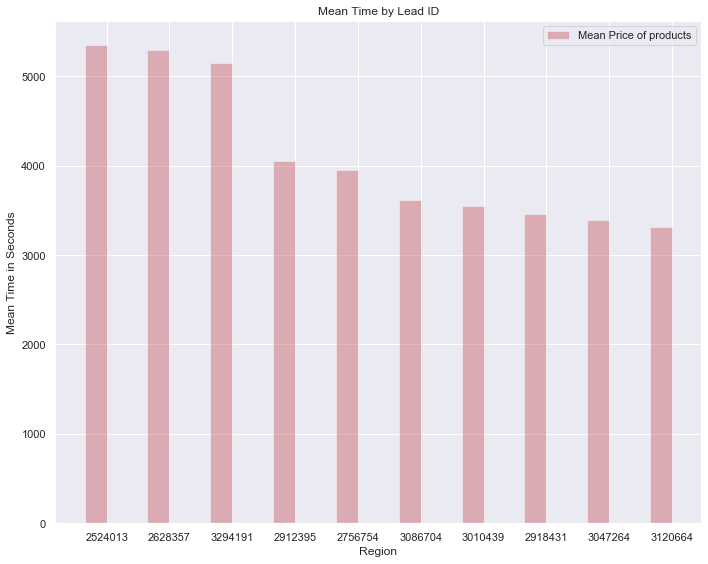

In [21]:
n_groups = 10

mean_time = leadid_groupby['handleTimeSeconds']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, mean_time, bar_width,
                alpha=opacity, color='r',
                label='Mean Time in seconds')

ax.set_xlabel('Region')
ax.set_ylabel('Mean Time in Seconds')
ax.set_title('Mean Time by Lead ID')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((leadid_groupby.T.columns))
ax.legend()

fig.tight_layout()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.show()

## Join and Split Data

Joining 2 data sheets on the 'dialerLeadId' column to further analyse and model the data. Implementing a left join.

In [22]:
compressed_join= df_call.merge(df_leads, how= 'left', on= 'dialerLeadId')

In [23]:
compressed_join.head(10)

,dialerLeadId,dimAgentId,callDate,callDateKey,callType,dispoGroup,dispoDescription,callAttemptNumber,handleTimeSeconds,callEndDate,callEndDateKey,nobleDispoCode,leadDate,leadDateKey,originalContactType,ageOnLeadGroup,gender,leadCost,callCenterLatestDispoGroup,callCenterLatestDispoDescription,currentSkill,originalSkill,maxAttempts,dailyMaxAttempts
0,3044121,749,2018-07-12 17:23:36.630,2018071217,Outbound,No Sale,Other Refusal / Not Interested,5,101,2018-07-12 17:25:17.337,2018071217,NS,2018-02-23 08:52:00.000,2018022308,OB,61 - 70,M,70.00,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0
1,3021053,737,2018-07-16 11:28:26.143,2018071611,Inbound,No Sale,Inquiry / Support Call,3,112,2018-07-16 11:30:18.340,2018071611,NS,2018-02-21 12:12:19.251,2018022112,IB,61 - 70,M,NaN,No Sale,Inquiry / Support Call,21.0,NaN,NaN,NaN
2,3356059,1142,2018-07-16 11:40:35.770,2018071611,Outbound,Non Workable,Disconnected Number,4,9,2018-07-16 11:40:44.323,2018071611,DC,2018-03-23 16:01:08.000,2018032316,OB,61 - 70,M,NaN,Non Workable,Disconnected Number,22.0,2.0,12.0,5.0
3,3021053,731,2018-07-16 11:44:22.557,2018071611,Manual Dial,No Sale,Inquiry / Support Call,4,303,2018-07-16 11:49:25.313,2018071611,NS,2018-02-21 12:12:19.251,2018022112,IB,61 - 70,M,NaN,No Sale,Inquiry / Support Call,21.0,NaN,NaN,NaN
4,3185345,987,2018-07-16 11:48:39.603,2018071611,Outbound,Still Workable,Left Message,3,86,2018-07-16 11:50:05.153,2018071611,LM,2018-03-07 11:40:50.442,2018030711,OB,61 - 70,M,20.54,Still Workable,Left Message,22.0,2.0,12.0,5.0
5,3001731,737,2018-07-16 13:30:44.837,2018071613,Inbound,No Sale,Inquiry / Support Call,3,117,2018-07-16 13:32:41.570,2018071613,NS,2018-02-20 03:00:45.000,2018022003,OB,61 - 70,F,50.00,No Sale,Inquiry / Support Call,22.0,2.0,12.0,5.0
6,3231700,746,2018-07-16 18:32:52.063,2018071618,Outbound Agent Callback,No Sale,Other Refusal / Not Interested,4,138,2018-07-16 18:35:10.900,2018071618,NS,2018-03-12 14:57:10.920,2018031214,OB,61 - 70,M,50.00,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0
7,2536714,735,2018-07-17 10:56:36.503,2018071710,Outbound,Still Workable,Pool callback,7,105,2018-07-17 10:58:21.457,2018071710,CB,2018-01-16 10:33:58.758,2018011610,OB,81 - 90,F,50.00,Still Workable,Pool callback,22.0,2.0,12.0,5.0
8,3146481,735,2018-07-17 11:03:29.133,2018071711,Manual Dial,No Sale,Inquiry / Support Call,5,943,2018-07-17 11:19:12.987,2018071711,NS,2018-03-06 13:32:47.454,2018030613,OB,71 - 80,F,NaN,No Sale,Inquiry / Support Call,21.0,NaN,NaN,NaN
9,3097625,749,2018-07-17 17:32:10.663,2018071717,Outbound Agent Callback,No Sale,Other Refusal / Not Interested,3,86,2018-07-17 17:33:36.423,2018071717,NS,2018-02-28 18:34:44.090,2018022818,OB,61 - 70,M,25.00,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0


In [24]:
#Here, checking for counts and unique values in dispoGroup column

print(compressed_join.dispoGroup.value_counts())

Still Workable        107480
No Sale                11470
Agent Call Back         4514
Non Workable            3414
Transfer Call           2761
Sale                    1648
System disposition       650
Do Not Call              200
System Disposition        25
Name: dispoGroup, dtype: int64


In [25]:
# We can see for above step that same values has 2 different names. Changing the name.

compressed_join.loc[(compressed_join.dispoGroup == 'System disposition'),'dispoGroup']='System Disposition'

<b>Now, for further processing and data modelling I have considered the dispoGroup column as my target variable and other columns as independent variable. To do this, I have created 3 categories namely, Sale, No Sale and Still Workable. 

I have grouped Agent Call Back, Transfer Call as Still workable category, and System disposition, DO not Call, Non Workable as No sale category. </b>

In [26]:
compressed_join.loc[(compressed_join.dispoGroup == 'Agent Call Back'),'dispoGroup']='Still Workable'
compressed_join.loc[(compressed_join.dispoGroup == 'Transfer Call'),'dispoGroup']='Still Workable'

compressed_join.loc[(compressed_join.dispoGroup == 'System Disposition'),'dispoGroup']='No Sale'
compressed_join.loc[(compressed_join.dispoGroup == 'Do Not Call'),'dispoGroup']='No Sale'
compressed_join.loc[(compressed_join.dispoGroup == 'Non Workable'),'dispoGroup']='No Sale'


In [27]:
compressed_join.head()

,dialerLeadId,dimAgentId,callDate,callDateKey,callType,dispoGroup,dispoDescription,callAttemptNumber,handleTimeSeconds,callEndDate,callEndDateKey,nobleDispoCode,leadDate,leadDateKey,originalContactType,ageOnLeadGroup,gender,leadCost,callCenterLatestDispoGroup,callCenterLatestDispoDescription,currentSkill,originalSkill,maxAttempts,dailyMaxAttempts
0,3044121,749,2018-07-12 17:23:36.630,2018071217,Outbound,No Sale,Other Refusal / Not Interested,5,101,2018-07-12 17:25:17.337,2018071217,NS,2018-02-23 08:52:00.000,2018022308,OB,61 - 70,M,70.00,No Sale,Other Refusal / Not Interested,22.0,2.0,12.0,5.0
1,3021053,737,2018-07-16 11:28:26.143,2018071611,Inbound,No Sale,Inquiry / Support Call,3,112,2018-07-16 11:30:18.340,2018071611,NS,2018-02-21 12:12:19.251,2018022112,IB,61 - 70,M,NaN,No Sale,Inquiry / Support Call,21.0,NaN,NaN,NaN
2,3356059,1142,2018-07-16 11:40:35.770,2018071611,Outbound,No Sale,Disconnected Number,4,9,2018-07-16 11:40:44.323,2018071611,DC,2018-03-23 16:01:08.000,2018032316,OB,61 - 70,M,NaN,Non Workable,Disconnected Number,22.0,2.0,12.0,5.0
3,3021053,731,2018-07-16 11:44:22.557,2018071611,Manual Dial,No Sale,Inquiry / Support Call,4,303,2018-07-16 11:49:25.313,2018071611,NS,2018-02-21 12:12:19.251,2018022112,IB,61 - 70,M,NaN,No Sale,Inquiry / Support Call,21.0,NaN,NaN,NaN
4,3185345,987,2018-07-16 11:48:39.603,2018071611,Outbound,Still Workable,Left Message,3,86,2018-07-16 11:50:05.153,2018071611,LM,2018-03-07 11:40:50.442,2018030711,OB,61 - 70,M,20.54,Still Workable,Left Message,22.0,2.0,12.0,5.0


### Train Data

Further, cleaning and preprocessing data for better results. From the above categories:

Train Data= Sale, No Sale

Test Data: Still Workable 

In [28]:
#Considering Sale and No Sale data for trainning and validating purpose.
modelling_data= compressed_join.loc[(compressed_join['dispoGroup']== 'Sale')]
modelling_data= modelling_data.append(compressed_join.loc[(compressed_join['dispoGroup']== 'No Sale')])

In [29]:
# Dropping some of the columns having more Null values,Ids, Codes.

columns=['callCenterLatestDispoDescription','maxAttempts', 'leadCost','leadDate', 'callDate',
                                            'dispoDescription', 'callEndDate', 'nobleDispoCode', 'callCenterLatestDispoGroup',
                                            'dialerLeadId', 'dimAgentId','callDateKey','callEndDateKey', 'leadDateKey',
                                            ]

modelling_data= modelling_data.drop(columns= columns, axis= 1)

In [30]:
# Checking datatypes of the above created dataframe
print(modelling_data.dtypes)

callType                object
dispoGroup              object
callAttemptNumber        int64
handleTimeSeconds        int64
originalContactType     object
ageOnLeadGroup          object
gender                  object
currentSkill           float64
originalSkill          float64
dailyMaxAttempts       float64
dtype: object


In [31]:
# converting Target variable (dispoGroup) to binary data (1/0) and changing object data types to integer.

modelling_data.dispoGroup[modelling_data.dispoGroup == 'Sale'] = 1
modelling_data.dispoGroup[modelling_data.dispoGroup == 'No Sale'] = 0

d:\software\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\software\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
#Fucntion to create dummy variables to call for train and test data.
def dummy(data):
    data = pd.get_dummies(data, columns=[ 'callType', 'originalContactType','ageOnLeadGroup', 'gender'], drop_first= True)
    return data

In [33]:
# Creating dummy for the train data columns.
modelling_data= dummy(modelling_data)

In [34]:
#Dropping the dummy variable which has negligible values.
modelling_data= modelling_data.drop(columns= 'ageOnLeadGroup_Under 20', axis= 1)

In [35]:
# Changing datatype for target variable.
modelling_data.dispoGroup= modelling_data.dispoGroup.astype('int64')

In [36]:
modelling_data.head()

,dispoGroup,callAttemptNumber,handleTimeSeconds,currentSkill,originalSkill,dailyMaxAttempts,callType_Manual Dial,callType_Outbound,callType_Outbound Agent Callback,callType_Voicemail,originalContactType_OB,ageOnLeadGroup_31 - 40,ageOnLeadGroup_41 - 50,ageOnLeadGroup_51 - 60,ageOnLeadGroup_61 - 70,ageOnLeadGroup_71 - 80,ageOnLeadGroup_81 - 90,ageOnLeadGroup_Over 90,gender_M,gender_U
26,1,12,132,22.0,2.0,5.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
28,1,4,2537,21.0,NaN,NaN,1,0,0,0,1,0,0,0,0,1,0,0,0,0
84,1,7,1325,22.0,2.0,5.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1330,1,10,3373,21.0,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1331,1,2,2311,2.0,2.0,5.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [37]:
print("Shape of Train Data:",modelling_data.shape)

Shape of Train Data: (17407, 20)


In [38]:
modelling_data.head()

,dispoGroup,callAttemptNumber,handleTimeSeconds,currentSkill,originalSkill,dailyMaxAttempts,callType_Manual Dial,callType_Outbound,callType_Outbound Agent Callback,callType_Voicemail,originalContactType_OB,ageOnLeadGroup_31 - 40,ageOnLeadGroup_41 - 50,ageOnLeadGroup_51 - 60,ageOnLeadGroup_61 - 70,ageOnLeadGroup_71 - 80,ageOnLeadGroup_81 - 90,ageOnLeadGroup_Over 90,gender_M,gender_U
26,1,12,132,22.0,2.0,5.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
28,1,4,2537,21.0,NaN,NaN,1,0,0,0,1,0,0,0,0,1,0,0,0,0
84,1,7,1325,22.0,2.0,5.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1330,1,10,3373,21.0,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1331,1,2,2311,2.0,2.0,5.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [39]:
# Imputting mode values in some columns to avoid null values.

modelling_data.dailyMaxAttempts.mode()[0]
modelling_data['originalSkill']= modelling_data['originalSkill'].fillna(modelling_data.originalSkill.mode()[0])
modelling_data['currentSkill']= modelling_data['currentSkill'].fillna(modelling_data.currentSkill.mode()[0])
modelling_data['dailyMaxAttempts']= modelling_data['dailyMaxAttempts'].fillna(modelling_data.dailyMaxAttempts.mode()[0])

### Test Data

Preprocessing the Test Data (i.e. Still Workable Category)

In [40]:
#Collecting Data in test dataframe.
test= compressed_join.loc[(compressed_join['dispoGroup']== 'Still Workable')]

In [41]:
# Checking for null values.
print("Null values: ",test.isnull().sum())

Null values:  dialerLeadId                            0
dimAgentId                              0
callDate                                0
callDateKey                             0
callType                                0
dispoGroup                              0
dispoDescription                        0
callAttemptNumber                       0
handleTimeSeconds                       0
callEndDate                             0
callEndDateKey                          0
nobleDispoCode                          2
leadDate                                0
leadDateKey                             0
originalContactType                     0
ageOnLeadGroup                       1046
gender                                  0
leadCost                            20924
callCenterLatestDispoGroup              0
callCenterLatestDispoDescription        0
currentSkill                            0
originalSkill                        2222
maxAttempts                          2262
dailyMaxAttempts    

In [42]:
#Creating dummy variables for the test data.
test_data= dummy(test)

In [43]:
#Dropping some unrequired columns having null values and Ids.

columns= ['callCenterLatestDispoDescription','maxAttempts', 'leadCost','leadDate', 'callDate',
          'dispoDescription', 'callEndDate', 'nobleDispoCode', 'callCenterLatestDispoGroup',
          'dialerLeadId', 'dimAgentId', 'callDateKey', 'callEndDateKey', 'leadDateKey', 'dispoGroup']

test_data= test_data.drop(columns= columns , axis= 1)

In [44]:
#Shape of test data
print("Shape of test data: ", test_data.shape)

Shape of test data:  (114755, 19)


In [45]:
test_data.head()

,callAttemptNumber,handleTimeSeconds,currentSkill,originalSkill,dailyMaxAttempts,callType_Manual Dial,callType_Outbound,callType_Outbound Agent Callback,callType_Voicemail,originalContactType_OB,ageOnLeadGroup_31 - 40,ageOnLeadGroup_41 - 50,ageOnLeadGroup_51 - 60,ageOnLeadGroup_61 - 70,ageOnLeadGroup_71 - 80,ageOnLeadGroup_81 - 90,ageOnLeadGroup_Over 90,gender_M,gender_U
4,3,86,22.0,2.0,5.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
7,7,105,22.0,2.0,5.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
11,4,73,22.0,2.0,5.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
12,2,322,2.0,2.0,5.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
13,7,163,22.0,2.0,5.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [46]:
# Imputting mode values in some columns to avoid null values in the test data.

test_data.dailyMaxAttempts.mode()[0]
test_data['originalSkill']= test_data['originalSkill'].fillna(test_data.originalSkill.mode()[0])
test_data['currentSkill']= test_data['currentSkill'].fillna(test_data.currentSkill.mode()[0])
test_data['dailyMaxAttempts']= test_data['dailyMaxAttempts'].fillna(test_data.dailyMaxAttempts.mode()[0])

### Modelling Data Split

In [47]:
#Separating target and independent variables.

y= modelling_data['dispoGroup']
X= modelling_data.drop(columns= 'dispoGroup', axis= 1)

In [48]:
#Checking correlation 
corr= X.corr()

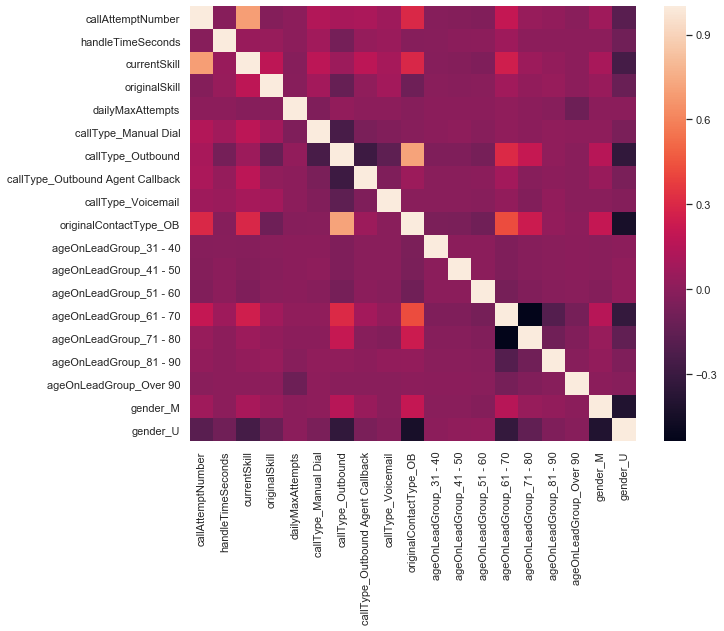

In [49]:
#Heatmap for the correlation matrix.

sns.heatmap(corr)

In [50]:
X.head()

,callAttemptNumber,handleTimeSeconds,currentSkill,originalSkill,dailyMaxAttempts,callType_Manual Dial,callType_Outbound,callType_Outbound Agent Callback,callType_Voicemail,originalContactType_OB,ageOnLeadGroup_31 - 40,ageOnLeadGroup_41 - 50,ageOnLeadGroup_51 - 60,ageOnLeadGroup_61 - 70,ageOnLeadGroup_71 - 80,ageOnLeadGroup_81 - 90,ageOnLeadGroup_Over 90,gender_M,gender_U
26,12,132,22.0,2.0,5.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
28,4,2537,21.0,2.0,5.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
84,7,1325,22.0,2.0,5.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1330,10,3373,21.0,2.0,5.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1331,2,2311,2.0,2.0,5.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [51]:
# As we can see that the data in imbalanced, we cannot directly run prediction models as it will give bad results.
#To overcome thsi situation OI have used SMOTE technique for oversampling the minority class.

sm = SMOTE(random_state=12, sampling_strategy=0.5)
X_res, y_res = sm.fit_sample(X, y)
print("Value counts before SMOTE:", collections.Counter(y))
print("Value counts after SMOTE:",np.bincount(y_res))

Value counts before SMOTE: Counter({0: 15759, 1: 1648})
Value counts after SMOTE: [15759  7879]


In [52]:
#Splitting the modelling data on 70-30 train test set.

X_train, X_validate, y_train, y_validate= train_test_split(X_res, y_res, test_size= 0.3, random_state= 45)

## Modelling

### Random Forest Classifier

<b>I am using Random Forest Classifier with GridSearchCV for hyper parameter tuning. Random Forest will help us get the important features for we will train the model on the Sale/ No sale data and use the Still Workable category created earlier for test purpose.</b>

In [53]:
#Creating parameter grid to tune the parameters required for RandomForestClassifier.

n_estimators = [450,500,550]
criterion = ['gini', 'entropy']
max_depth = [15, 20, 25]
min_samples_split = [3, 5, 10]
min_samples_leaf = [1, 2, 3] 

#Dictionay for the grid
parameter_grid = dict(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth,
                      min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Model to be used: RandomForestClassifier with random_state=4
estimator= RandomForestClassifier(random_state= 4)  

#GridSearchCV on the above declared model and parameters.
rf_grid = GridSearchCV(estimator, parameter_grid, cv = 3, scoring='f1', verbose=1, n_jobs = -1)
rf_model= rf_grid.fit(X_train, y_train)
print("Random Forest Classifier Best Model in GridSearch: ", rf_model)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 12.0min finished


Random Forest Classifier Best Model in GridSearch:  GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [450, 500, 550]},
             scoring='f1', verbose=1)


In [54]:
## Printing Best parameters from the grid search.
print("Best Parameters after tuning: ", rf_model.best_params_)

Best Parameters after tuning:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 550}


In [55]:
#Running Final Random Forest Classifier Model using the tuned Hyperparameter.
rf = RandomForestClassifier(random_state = 12, n_estimators = 550, criterion= "gini", 
                            max_depth= 20, min_samples_leaf= 2, min_samples_split= 5) 

rf_final_model = rf.fit(X_train, y_train)
print("Random Forest Classifier Final Model: ", rf_final_model)

Random Forest Classifier Final Model:  RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=550, random_state=12)


In [56]:
#Predicting values of the validation set, and printing metrics.
y_pred = rf_final_model.predict(X_validate)

print("F1-Score :" ,f1_score(y_validate, y_pred))
print("Precision:" ,precision_score(y_validate, y_pred))
print("Accuracy :", accuracy_score(y_validate, y_pred))

F1-Score : 0.9476130122517955
Precision: 0.9504237288135593
Accuracy : 0.9650310208685843


In [57]:
#Predicting values of the Train set, and printing metrics.
y_pred_train = rf_final_model.predict(X_train)

print("F1-Score :" ,f1_score(y_train, y_pred_train))
print("Precision:" ,precision_score(y_train, y_pred_train))
print("Accuracy :", accuracy_score(y_train, y_pred_train))

F1-Score : 0.9694559913247786
Precision: 0.964574716777558
Accuracy : 0.9795721020186148


<b>Feature Importance in the Random Forest Classifier.</b>

In [58]:
importances= rf_final_model.feature_importances_ 

Feature ranking:
1. feature 1 (0.605392)
2. feature 6 (0.092811)
3. feature 2 (0.075832)
4. feature 3 (0.058553)
5. feature 18 (0.033934)
6. feature 0 (0.029343)
7. feature 14 (0.023364)
8. feature 13 (0.020584)
9. feature 9 (0.019638)
10. feature 17 (0.013286)
11. feature 15 (0.009421)
12. feature 7 (0.005802)
13. feature 5 (0.005380)
14. feature 8 (0.003380)
15. feature 4 (0.001728)
16. feature 16 (0.001140)
17. feature 12 (0.000279)
18. feature 11 (0.000074)
19. feature 10 (0.000060)


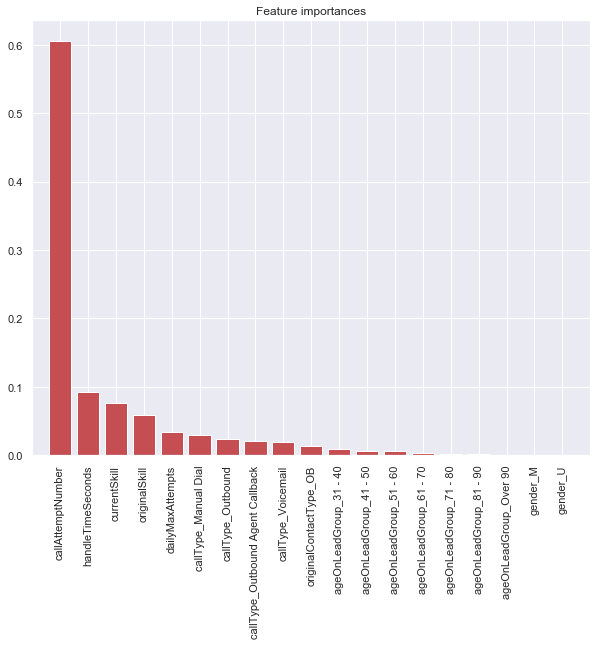

In [59]:
# Plot the Feature Importance.
print("Feature ranking:")

std = np.std([rf_final_model.feature_importances_ for tree in rf_final_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation= 90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Hypothesis Test

In [60]:
# Keep data only for target variable and top 2 featire from previous results
hyp_test_sales= modelling_data.loc[(modelling_data['dispoGroup']== 1)]
#hyp_test_sales= hyp_test1.drop(columns= ['callAttemptNumber','handleTimeSeconds'], inplace= True )

In [61]:
hyp_test_sales= hyp_test_sales[['callAttemptNumber', 'handleTimeSeconds', 'dispoGroup']]

In [62]:
hyp_test_sales.mean()

callAttemptNumber       2.780340
handleTimeSeconds    2256.004854
dispoGroup              1.000000
dtype: float64

H<sub>0</sub>: Average attempts of call is 4.8


H<sub>a</sub>: Number of attempts per customer should be close to 3 to increase the chance of sale.

In this hypothesis, I would like to check the significance for callAttempts column, if an agent calls a customer more then 3 will increase the chance of making a sale.

In [63]:
call_attempt = compressed_join.callAttemptNumber          

calls_mean = np.mean(compressed_join.callAttemptNumber)
print(calls_mean)


tset, pval = ttest_1samp(call_attempt, 2.78)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we fail to reject null hypothesis")


4.781851061575945
p-values 0.0
 we are rejecting null hypothesis


From the above results,
Here, I considered a sample from the data where the sale was made and it gave an mean value close to 3. Which has a p-value less then 0.05, therefore, we reject the null hypothesis.

 We can say that the p-value is less then 0.05, therefore, we reject the H<sub>0</sub> Hypothesis. 

H<sub>0</sub>: Average Handle time in seconds is 2000.

H<sub>a</sub>: Handle time in seconds should be greater then 200 seconds to increase the chance of sale.

In this hypothesis, I would like to check the significance for callAttempts column, if handle time in seconds is greater of then 200, it will increase the chance of making a sale.


In [64]:
time_seconds = compressed_join.handleTimeSeconds          

time_seconds_mean = np.mean(compressed_join.handleTimeSeconds)
print(time_seconds_mean)


tset, pval = ttest_1samp(time_seconds, 2256)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we fail to reject null hypothesis")

137.09723672462584
p-values 0.0
 we are rejecting null hypothesis


From the above results,
Here, I considered a sample from the data where the sale was made and it gave an mean value close to 200 seconds. Which has a p-value less then 0.05, therefore, we reject the null hypothesis.


We can say that the p-value is less then 0.05, therefore, we reject the H<sub>0</sub> Hypothesis.

## Recommendations

1.	From the Basic Analysis, we can infer that most common reason for No Sale is "Not Interested", therefore, I recommend changing the way the product is presented to the customer and establish a better connection between customer and the product.


2.	Incentivize the agents with maximum number of sales so the agents would try their best to make sales.


3.	From the hour analysis above, we can see that most of the no sales calls are made in the time frame 14-16. One of the reasons could be that the customers are busy during the day, therefore, optimizing the agent call timings would be great solution to improve sales. For instance, a greater number of calls can be made in the evening when the customers are home after work, or during lunch time so they would be available for a chat.


4.	Targeting right age group and gender customers, this can be done with some product analysis, demographic analysis. If additional data for customer demographics (income, members in a house) these parameters could help target right people and hence increase sales.


5.	Assigning the skillful agents to right customers and training other agents would enhance the sales. This could be done with some agent data (skills, experience) based on their parameters.


6.	Predictive model can be built for predicting the still workable category of people and utilize resources accordingly on the right customers. In my report I have built a Classifier to classify the Still workable category to sale or no sale, this model has given a good train and validate score and have predicted the result for the test data. This model can further be improved with adding some extra features and working on a larger train dataset.


7.	Based on the hypothesis tests, we can target more significant feature like callAttempt and handletimeSecond to optimize the model. This way we can work on those features and increase our resources to target potential buyers.


8.	Moreover, more historical data could help use better understand the trends and analyze patterns for further analysis and improve the company sales.


 <div style="text-align: center" font-size= "50"><b> Thank you! </div>